In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [15]:
input_csv = 'csv/output_lemmatized.csv'
df = pd.read_csv(input_csv)
print(df.head())

   id                                               text  class
0   1  accountant summary financial accountant specia...      0
1   2  staff accountant summary highly analytical det...      0
2   3  accountant professional summary obtain positio...      0
3   4  senior accountant experience company name june...      0
4   5  senior accountant professional summary senior ...      0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.33, random_state=None)
print(f"Conjunto de treino: {len(X_train)} exemplos")
print(f"Conjunto de teste: {len(X_test)} exemplos")


Conjunto de treino: 1663 exemplos
Conjunto de teste: 820 exemplos


In [18]:
def train_naive_bayes(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [19]:
def train_random_forest(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', RandomForestClassifier())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [20]:
def train_bernoulli(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', BernoulliNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [21]:
def train_logistic_regression(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_knn(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()), 
        ('clf', KNeighborsClassifier(n_neighbors=7)) 
    ])
    pipeline.fit(X_train, y_train) 
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [47]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  num_models = len(models)
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)

  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)

  plt.xlabel('Modelos')
  plt.ylabel('Acurácia')
  plt.title('Acurácia dos Modelos de Classificação')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [50]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)
nb_accuracy = train_naive_bayes(X_train, y_train, X_test)
rf_accuracy = train_random_forest(X_train, y_train, X_test)
lr_accuracy = train_logistic_regression(X_train, y_train, X_test)
br_accuracy = train_bernoulli(X_train, y_train, X_test)

accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 7': knn_accuracy
}

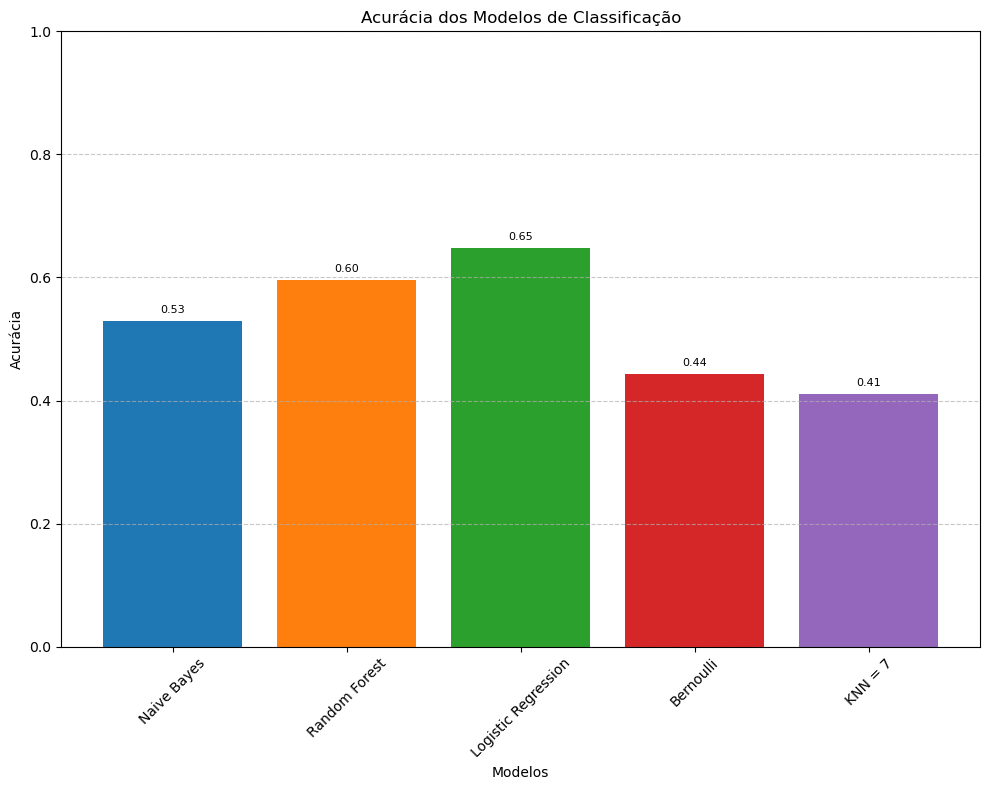

In [51]:
plot_accuracies(accuracies)

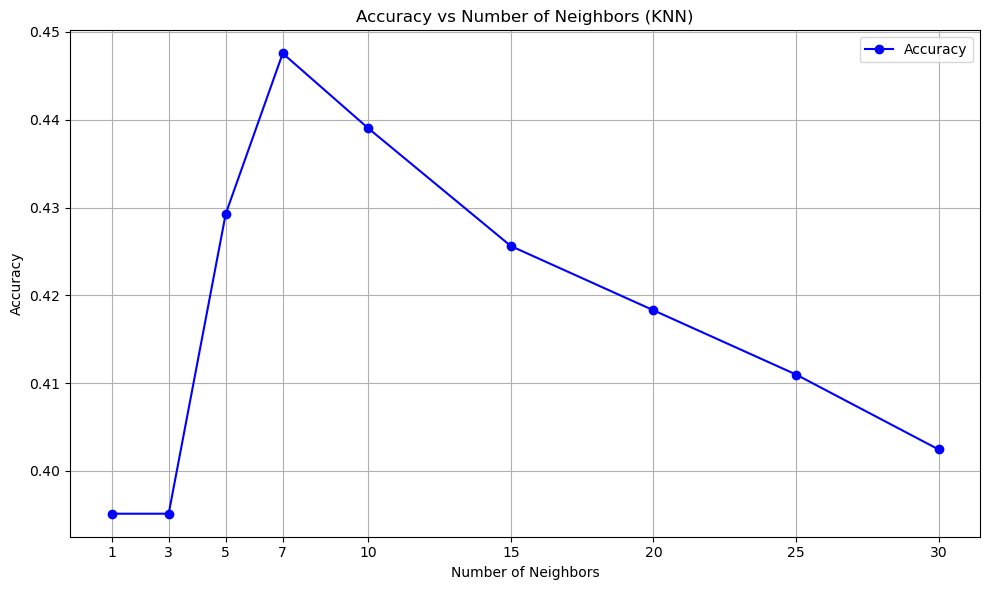

In [49]:
def train_knn_multiple_neighbors(X_train, y_train, X_test, y_test, neighbors_list):
    accuracies = []
    for n_neighbors in neighbors_list:
        pipeline = Pipeline([
            ('vect', CountVectorizer()),
            ('clf', KNeighborsClassifier(n_neighbors=n_neighbors)) ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return accuracies

def plot_accuracy_vs_neighbors(neighbors_list, accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(neighbors_list, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.title('Accuracy vs Number of Neighbors (KNN)')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.xticks(neighbors_list)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



neighbors_list = [1, 3, 5, 7, 10, 15, 20, 25, 30]

accuracies_knn = train_knn_multiple_neighbors(X_train, y_train, X_test, y_test, neighbors_list)

plot_accuracy_vs_neighbors(neighbors_list, accuracies_knn)
